## GXBOOST




In [38]:
sys.path.append("..")
import pandas as pd
import numpy as np
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Models making
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split,  cross_val_predict, cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Metrics
from sklearn.metrics import r2_score,  mean_squared_error, mean_absolute_error, accuracy_score

# XGBoost model
from xgboost import XGBRegressor, XGBClassifier
import seaborn as sns
from timeit import default_timer as timer

#Plotting
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
# Specifing figure layout
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_color_codes('bright')
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}
plt.rcParams["figure.figsize"] = (15, 10)

RSEED = 10

In [39]:
Alloys= pd.read_csv("../data/Alloy_Inter.csv")

In [40]:
#Alloys.isna().sum()

In [41]:
### Defining X and y

X = Alloys.drop(["Epit"], axis=1)
y = Alloys["Epit"]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#stratify=y throws an error refering to the y being too little of one of the two choices, but actually y has lots of choices

## Preprocessing

In [43]:
# You have to define which columns you want to scale, in this case, all the metals ions
col_scale_1 = ['Cl', 'Test_Temp', 'pH', 'Fe', 'Cr', 'Ni', 'Mo', 'W', 'Nb', 'C', 'Si', 'Mn', 'Al', 'V', 'Ta','Re', 'Ce', 'Ti', 'Co', 'B', 'Mg', 'Y', 'Gd']
#X1_train= X1_train.drop(col_scale) axis=1)
#Normalisation
# Scaling with MinMaxScaler
scaler_1= MinMaxScaler()
X1_train_scaled= scaler_1.fit_transform(X_train[col_scale_1])
X1_test_scaled= scaler_1.transform(X_test[col_scale_1])
#X1_test_scaled.columns=['Cl', 'Test_Temp', 'pH', 'Fe', 'Cr', 'Ni', 'Mo', 'W', 'Nb', 'C', 'Si', 'Mn', 'Al', 'V', 'Ta','Re', 'Ce', 'Ti', 'Co', 'B', 'Mg', 'Y', 'Gd']
# Concatenating scaled and dummy columns 
X1_train_preprocessed= np.concatenate([X1_train_scaled, X_train.drop(col_scale_1, axis=1)], axis=1)
X1_test_preprocessed= np.concatenate([X1_test_scaled, X_test.drop(col_scale_1, axis=1)], axis=1)

In [44]:
Class= X_train.drop(col_scale_1, axis=1)
Class.columns

Index(['M_Al', 'M_Fe', 'M_HEA', 'M_NiCrMo', 'M_Other'], dtype='object')

In [45]:
X1_test_preprocessed=pd.DataFrame(X1_test_preprocessed)
X1_test_preprocessed.columns=['Cl', 'Test_Temp', 'pH', 'Fe', 'Cr', 'Ni', 'Mo', 'W', 'Nb', 'C', 'Si', 'Mn', 'Al', 'V', 'Ta','Re', 'Ce', 'Ti', 'Co', 'B', 'Mg', 'Y', 'Gd', 'M_Al', 'M_Fe', 'M_HEA', 'M_NiCrMo', 'M_Other']

https://towardsdatascience.com/fine-tuning-xgboost-in-python-like-a-boss-b4543ed8b1e

## XGBoost

In [67]:
xgb = XGBRegressor()
score_xgb= cross_val_score(xgb, X1_train_preprocessed, y_train, cv=5) #n_jobs=-1

#predictions = [round(value)for value in y1_pred]
xgb.fit(X1_train_preprocessed, y_train)

# make predictions on test set
y1_pred = xgb.predict(X1_test_preprocessed)

In [68]:
#train a XGboox
y_pred_train = xgb.predict(X1_train_preprocessed)
predictions_t = [round(value)for value in y_pred_train]

In [51]:
mae= mean_absolute_error(y_test, y1_pred).round(3)
RMSE= mean_squared_error(y_test, y1_pred, squared=False).round(3)
R2 =  r2_score(y_test, y1_pred).round(3)
Ratio = ((mean_squared_error(y_test, y1_pred, squared=False))/(mean_absolute_error(y_test, y1_pred))).round(3)

mae_t= mean_absolute_error(y_train, y_pred_train).round(3)
RMSE_t= mean_squared_error(y_train, y_pred_train, squared=False).round(3)
R2_t =  r2_score(y_train, y_pred_train).round(3)
Ratio_t= ((mean_squared_error(y_train, y_pred_train, squared=False))/(mean_absolute_error(y_train, y_pred_train))).round(3)

In [52]:
#Model Metrics
print("MAE for Lr Test:", mae, "MAE for Lr Train Data:", mae_t)
print("RMSE for Lr  Test:", RMSE, "RMSE for Lr  Train Data:", RMSE_t)
print("R2 for Lr  Test:", R2, "R2 for Lr  Train Data :", R2_t)
print("RMSE/MAE Ratio Test :", Ratio, "RMSE/MAE Ratio train :", Ratio_t)

MAE for Lr Test: 125.438 MAE for Lr Train Data: 19.874
RMSE for Lr  Test: 198.648 RMSE for Lr  Train Data: 30.766
R2 for Lr  Test: 0.775 R2 for Lr  Train Data : 0.995
RMSE/MAE Ratio Test : 1.584 RMSE/MAE Ratio train : 1.548


In [53]:
residuals_XGboox_test= y_test - y1_pred
#compute mean residuals
np.mean(residuals_XGboox_test).round(3)

1.334

In [54]:
residuals_XGboox_train= y_train - y_pred_train
#compute mean residuals
np.mean(residuals_XGboox_train).round(3)

0.0

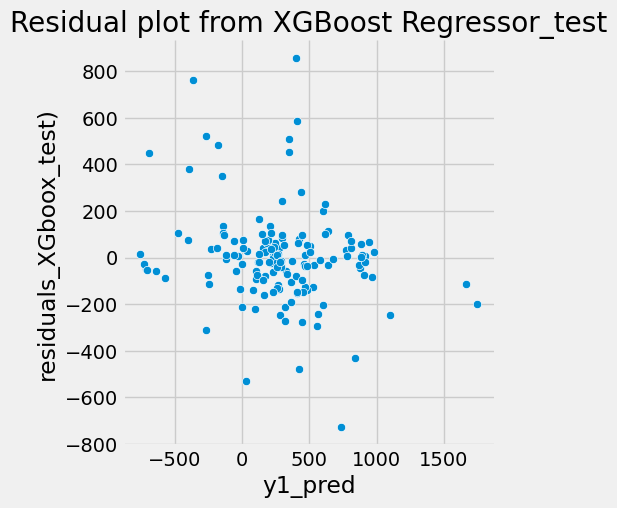

In [55]:
#sns.scatterplot(x=y3_ghat, y=residuals_XGboox, hue= X3_test)-- hue=X3_test["Fe"], size=y3_test, sizes=(40, 400), alpha=.5, palette="muted", height=6, data=residuals_XGboox)
sns.relplot(x=y1_pred, y=residuals_XGboox_test) #hue=X4_test, size=y4_test)
plt.xlabel('y1_pred')
plt.ylabel('residuals_XGboox_test)')
plt.title('Residual plot from XGBoost Regressor_test')
plt.show();

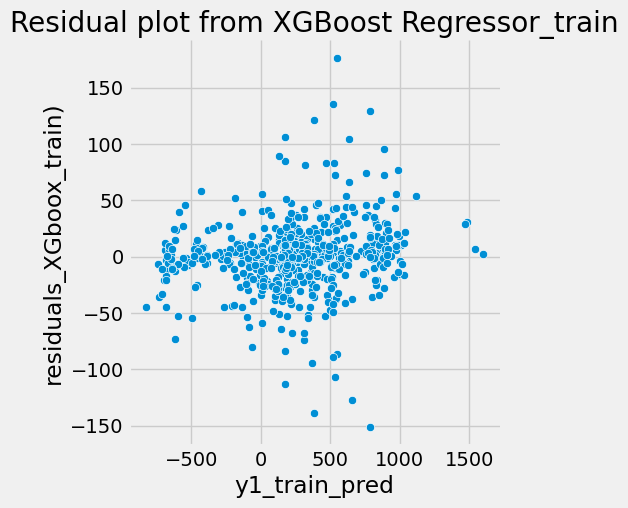

In [56]:
sns.relplot(x=y_pred_train, y=residuals_XGboox_train) 
plt.xlabel('y1_train_pred')
plt.ylabel('residuals_XGboox_train)')
plt.title('Residual plot from XGBoost Regressor_train')
plt.show();

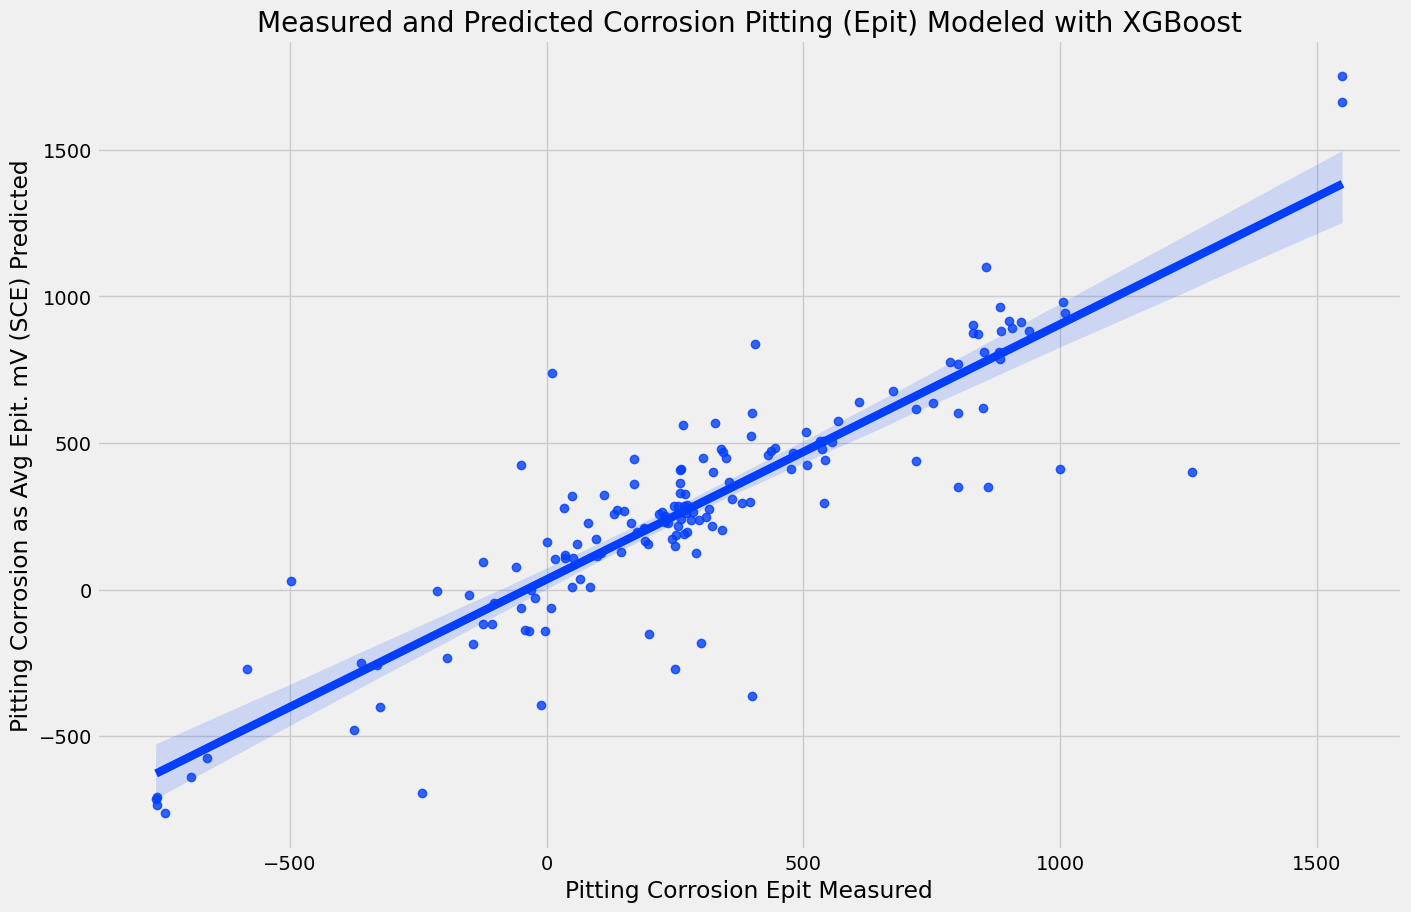

In [57]:
## Measured vs predicted with XGboox
#Adding a fittet regression line and another line :y1_train,  y1_train_pred'
sns.regplot(x=y_test, y=y1_pred, color='b')#, hue=X_test)
plt.xlabel('Pitting Corrosion Epit Measured')
plt.ylabel('Pitting Corrosion as Avg Epit. mV (SCE) Predicted')
plt.title('Measured and Predicted Corrosion Pitting (Epit) Modeled with XGBoost');

In [58]:
X1_test_preprocessed.columns=['Cl', 'Test_Temp', 'pH', 'Fe', 'Cr', 'Ni', 'Mo', 'W', 'Nb', 'C', 'Si', 'Mn', 'Al', 'V', 'Ta','Re', 'Ce', 'Ti', 'Co', 'B', 'Mg', 'Y', 'Gd', 'M_Al', 'M_Fe', 'M_HEA', 'M_NiCrMo', 'M_Other']
#suppose to be same as Alloys with whole element composition plus the 

## Hyperparameter Tuning
GridSearchCV

https://towardsdatascience.com/step-by-step-tutorial-on-linear-regression-with-stochastic-gradient-descent-1d35b088a843

In [59]:
#what parameters does XGBoost have?
xgb.get_params().keys()

dict_keys(['objective', 'base_score', 'booster', 'callbacks', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'early_stopping_rounds', 'enable_categorical', 'eval_metric', 'gamma', 'gpu_id', 'grow_policy', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_bin', 'max_cat_to_onehot', 'max_delta_step', 'max_depth', 'max_leaves', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'predictor', 'random_state', 'reg_alpha', 'reg_lambda', 'sampling_method', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [60]:
xgb_params = {'n_estimators': [150, 200, 300],
                'learning_rate': [0.05, 0.1, 2],
                'colsample_bylevel': [0.5, 2, 5],
                'max_leaves': [0, 5, 20],
                "penalty" : ["l2", "l1", "none"],
                'eta': [0.1, 0.5, 2],
                'min_child_weight': [2, 5, 10] }# 'objective': ['reg: linear', ]'learning_rate':[1, 2, 5]


grid_gs = GridSearchCV(XGBRegressor(seed=42), xgb_params, scoring=('neg_root_mean_squared_error'),
                  cv=5,  verbose=0, n_jobs=-1)

grid_gs.fit(X1_train_preprocessed, y_train)

[22:56:55] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "penalty" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:56:55] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "penalty" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:56:55] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-a

/Users/beatrizamandawatts/neufische/Corrosion_85_prediction/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
7290 fits failed out of a total of 10935.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3645 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/beatrizamandawatts/neufische/Corrosion_85_prediction/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/beatrizamandawatts/neufische/Corrosion_85_prediction/.venv/lib/python3.9/site-packages/xgboost/core.py", line 575, in inner_f
    return f(**kwargs)
  File "/Users/beatrizamandawatts/neu

[22:58:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "penalty" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             n_jobs=-1,
             

In [72]:
# Fit gridsearch object to data.. also lets see how long it takes
start = timer()
grid_gs.fit(X1_train_preprocessed, y_train)
end = timer()
grid_gs_time = end-start

[23:11:06] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "penalty" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:11:06] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "penalty" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:11:07] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-a

/Users/beatrizamandawatts/neufische/Corrosion_85_prediction/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
7290 fits failed out of a total of 10935.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3645 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/beatrizamandawatts/neufische/Corrosion_85_prediction/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/beatrizamandawatts/neufische/Corrosion_85_prediction/.venv/lib/python3.9/site-packages/xgboost/core.py", line 575, in inner_f
    return f(**kwargs)
  File "/Users/beatrizamandawatts/neu

[23:13:55] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "penalty" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [73]:
# Best score
print('Best score:', round(grid_gs.best_score_, 3))

# Best parameters
print('Best parameters:', grid_gs.best_params_)

Best score: -221.585
Best parameters: {'colsample_bylevel': 0.5, 'eta': 0.1, 'learning_rate': 0.05, 'max_leaves': 0, 'min_child_weight': 5, 'n_estimators': 300, 'penalty': 'l2'}


In [74]:
# we will do this at least twice.. according to DRY we should write a function
def print_pretty_summary(grid_gs, xgb, y_test, y1_pred, y_train, y_pred_train):
    print(grid_gs)
    print('=======================')
    print('n_estimators: {}'.format(xgb.n_estimators))
    print('learning_rate: {}'.format(xgb.learning_rate))
    print('max_leaves: {}'.format(xgb.max_leaves))
    print('min_child_weight: {}'.format(xgb.min_child_weight))
    print("MAE: {:2f}".format(mean_absolute_error(y_test, y1_pred).round(3)))
    print("RMSE: {:2f}".format(mean_squared_error(y_test, y1_pred, squared=False).round(3)))
    print("R2: {:2f}".format(r2_score(y_test, y1_pred).round(3)))
    print("MAE: {:2f}".format(mean_absolute_error(y_train , y_pred_train).round(3)))
    print("RMSE: {:2f}".format(mean_squared_error(y_train , y_pred_train, squared=False).round(3)))
    print("R2: {:2f}".format(r2_score(y_train , y_pred_train).round(3))) 

In [75]:
print_pretty_summary(xgb, xgb, y_test, y1_pred, y_train, y_pred_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
n_estimators: 100
learning_rate: None
max_leaves: None
min_child_weight: None
MAE: 125.438000
RMSE: 198.648000
R2: 0.775000
MAE: 19.874000
RMSE: 30.766000
R2: 0.995000


In [ ]:
# X1_train_preprocessed is an array, lets make of it a df to plot it
df= pd.DataFrame(X1_train_preprocessed, y_train)
df.columns=['Cl', 'Test_Temp', 'pH', 'Fe', 'Cr', 'Ni', 'Mo', 'W', 'Nb', 'C', 'Si', 'Mn', 'Al', 'V', 'Ta','Re', 'Ce', 'Ti', 'Co', 'B', 'Mg', 'Y', 'Gd', 'M_Al', 'M_Fe', 'M_HEA', 'M_NiCrMo', 'M_Other', 'Epit']
#suppose to be same as Alloys with whole element composition plus the 


In [ ]:
# Plot histograms for train data
fig,ax = plt.subplots(4,3,figsize=(16,16))
count = 0
for item in df.columns.tolist():
    sns.histplot(df[item], kde=True, ax=ax[int(count/3)][count%3], color='#658AFF').set(title=item, xlabel='')
    count += 1
ax.flat[-2].set_visible(False)
ax.flat[-1].set_visible(False)
fig.tight_layout(pad=3)